In [0]:
# Access kaggle on colab and autentication
!mkdir ~/.kaggle/
!echo '{"username":"aimableishimwemanzi","key":"f2dbe25f904cd370e40c20e5fbef068f"}' > ~/.kaggle/kaggle.json

In [2]:
#downloading files only use #nt names
!kaggle competitions download -c cassava-disease

  0% 0.00/645k [00:00<?, ?B/s]
100% 645k/645k [00:00<00:00, 93.0MB/s]
100% 1.04G/1.04G [00:13<00:00, 74.3MB/s]
100% 1.04G/1.04G [00:13<00:00, 82.4MB/s]
 97% 497M/515M [00:06<00:00, 68.1MB/s]
100% 515M/515M [00:06<00:00, 81.3MB/s]
 98% 761M/777M [00:10<00:00, 59.5MB/s]
100% 777M/777M [00:10<00:00, 75.0MB/s]
  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 74.9MB/s]


In [0]:
# unzip files    #cptr helps not to print all unzip files
%%capture 
!unzip train.zip
!unzip test.zip
!unzip extraimages.zip

In [3]:
# Libraries 
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import  DataLoader, WeightedRandomSampler, SubsetRandomSampler 
import matplotlib.pyplot as plt
import time
import os
import copy

print("Pytorch Version: ",torch.__version__)
print("Torchvision Version ",torchvision.__version__)

Pytorch Version:  1.4.0
Torchvision Version  0.5.0


In [0]:
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


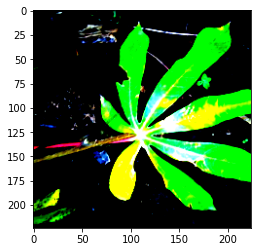

1 cbsd


In [8]:
# Loading the datasets and plot some images
dataset = datasets.ImageFolder('train',transform=train_transform)
img,label = dataset[500]
plt.imshow(img.permute(2,1,0))
plt.show()
print(label, dataset.classes[label])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']
dataset size:  5656


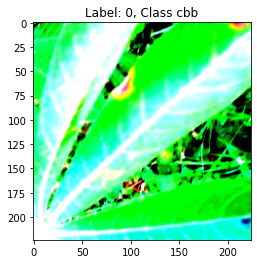

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


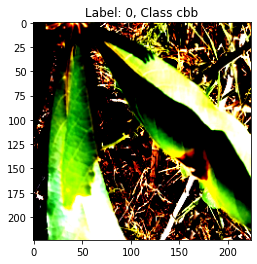

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


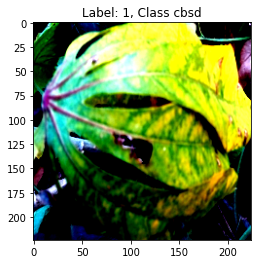

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


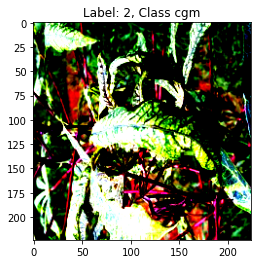

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


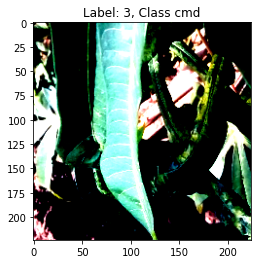

In [9]:
# Access different directories in train ( class name), 
print(dataset.classes)
print('dataset size: ', len(dataset))
class_names = dataset.classes

for i in 0, 100, 1000, 2000, 5000:
  img,label = dataset[i]
  plt.title(f'Label: {label}, Class {class_names[label]}')
  plt.imshow(img.permute(2,1,0))
  plt.show()

In [10]:
# list of all labels
labels = dataset.targets
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [11]:
# unique element
my_list = [2,3,5,6,6,7]
np.unique(my_list)

array([2, 3, 5, 6, 7])

In [12]:
# unique elts and count
#labels = dataset.targets
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 466, 1443,  773, 2658,  316]))

In [13]:
#
_,labels_count = np.unique(labels, return_counts=True)
labels_count

array([ 466, 1443,  773, 2658,  316])

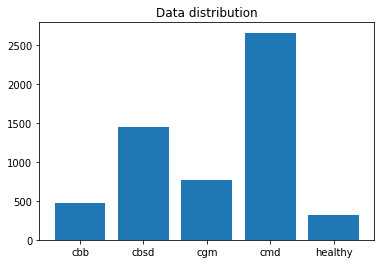

In [14]:
# viewing datasets distribution
plt.title('Data distribution')
plt.bar(class_names, labels_count)
plt.show()

In [15]:
# view percentage of each class
distribution_perc = 100*labels_count/len(dataset)
distribution_perc.round(1)

array([ 8.2, 25.5, 13.7, 47. ,  5.6])

In [16]:
#size of dataset
dataset_size = len(dataset)

distribution_perc = 100*labels_count/dataset_size

for class_name, count, distrib in zip(class_names,labels_count,distribution_perc):
  print(f'{class_name} {distrib:.2f}% - {count} Images')
print('Total Images:',dataset_size,'Images')

cbb 8.24% - 466 Images
cbsd 25.51% - 1443 Images
cgm 13.67% - 773 Images
cmd 46.99% - 2658 Images
healthy 5.59% - 316 Images
Total Images: 5656 Images


In [0]:
#spllit each class into 20% for test and 80% for train bcz all have #nt size
from sklearn.model_selection import train_test_split

#split train and test
train_idx, valid_idx = train_test_split(
    np.arange(dataset_size),
    test_size = 0.1,
    shuffle = True,
    stratify = labels  # take uniform distribution of each class
)

In [18]:
# test if all dataset are split well
labelss = np.array(labels)
_,valid_dist = np.unique(labelss[valid_idx], return_counts=True)
valid_dist

array([ 47, 144,  77, 266,  32])

In [19]:
labels_count

array([ 466, 1443,  773, 2658,  316])

In [0]:
# SubsetRandomSampler(Help to split our data randomly or shuffled) 

batch_size = 64

#draw samples from datasets
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler) #shuffle=True)
valid_loader = DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)

In [21]:
# Define first model
model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [22]:
# how model looks like "Architecture"
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [23]:
# view last input channels
in_features = model.fc.in_features
in_features

2048

In [0]:
#lock previous layer
for param in model.parameters():
  param.requires_grad = False

In [0]:
# change last layer to be the same as our output class
model.fc = nn.Linear(in_features=2048, out_features=5)

In [26]:
# view the new model
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [0]:
# put model to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
model = model.to(device)

In [59]:
# loss function
criteration = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

# param.requires_grad = False

for epoch in range(20):
  print(f'epoch {epoch+1}')
  number_corect = 0
  sum_loss = 0
  for datas, targets in train_loader:
    datas = datas.to(device)
    targets = targets.to(device)

    optimizer.zero_grad()

    #predict
    outputs = model(datas)

    #update model
    loss = criteration(outputs, targets)

    #update model
    loss.backward()
    optimizer.step()

    #compute metrics
    max_index = outputs.max(dim=1)[1]
    sum_loss +=loss.item()
    number_corect += (max_index == targets.data).sum()

  #print metrics
  loss = sum_loss / len(train_loader)
  accuracy = 100.0*number_corect / len(train_idx)

  print(f'Loss {loss}, Accuracy {accuracy}')

epoch 1
Loss 0.8224140211939812, Accuracy 62.94200897216797
epoch 2
Loss 0.8146648108959198, Accuracy 63.1541748046875
epoch 3
Loss 0.799441684037447, Accuracy 63.772987365722656
epoch 4
Loss 0.7981219403445721, Accuracy 64.09123229980469
epoch 5
Loss 0.791634275764227, Accuracy 64.32107543945312
epoch 6
Loss 0.7868693813681602, Accuracy 64.6746826171875
epoch 7
Loss 0.7848421156406402, Accuracy 64.39179992675781
epoch 8
Loss 0.7736837804317475, Accuracy 64.99292755126953
epoch 9
Loss 0.7768619962036609, Accuracy 65.45262145996094
epoch 10
Loss 0.77337876111269, Accuracy 65.62942504882812
epoch 11
Loss 0.7686488568782807, Accuracy 65.16973114013672
epoch 12
Loss 0.7694093719124794, Accuracy 65.22277069091797
epoch 13
Loss 0.7647442676126956, Accuracy 65.98302459716797
epoch 14
Loss 0.7517705798149109, Accuracy 65.96534729003906
epoch 15
Loss 0.7470246605575085, Accuracy 65.4349365234375
epoch 16
Loss 0.7545278236269951, Accuracy 65.4172592163086
epoch 17
Loss 0.7529472388327122, Accura

In [31]:
model1 = models.resnext101_32x8d(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth" to /root/.cache/torch/checkpoints/resnext101_32x8d-8ba56ff5.pth


In [32]:
model1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [33]:
model1.fc.in_features

2048

In [0]:
#lock previous layer
for param in model1.parameters():
  param.requires_grad = False

In [0]:
model1.fc = nn.Linear(in_features=2048,out_features=5)

In [0]:
#model1

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
model1 = model1.to(device)

In [0]:
criteration = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr = 0.015)

In [43]:
for epoch in range(20):
  print(f'epoch {epoch+1}')
  nb_correct = 0
  sum_los = 0
  for datass, targets in train_loader:
    datass = datass.to(device)
    targets = targets.to(device)

    optimizer.zero_grad()

    outputss = model1(datass)

    losss = criteration(outputss, targets)

    losss.backward()
    optimizer.step()
    max_index = outputss.max(dim=1)[1]
    sum_los +=losss.item()
    nb_correct += (max_index == targets.data).sum()

  #print metrics
  losss = sum_los / len(train_loader)
  accuracy = 100.0*nb_correct / len(train_idx)

  print(f'Loss {losss}, Accuracy {accuracy}')


epoch 1
Loss 0.6272115334868431, Accuracy 70.19094848632812
epoch 2
Loss 0.6179069362580776, Accuracy 70.42079162597656
epoch 3
Loss 0.6096371423453093, Accuracy 70.24398803710938
epoch 4
Loss 0.6048748001456261, Accuracy 71.26944732666016
epoch 5
Loss 0.6188058141618967, Accuracy 70.10254669189453
epoch 6
Loss 0.6073708958923817, Accuracy 69.92574310302734
epoch 7
Loss 0.6037994667887687, Accuracy 70.5445556640625
epoch 8
Loss 0.6036458354443311, Accuracy 70.93352508544922
epoch 9
Loss 0.5978358574211597, Accuracy 70.91584014892578
epoch 10
Loss 0.5961977303028106, Accuracy 70.88048553466797
epoch 11
Loss 0.5923651039600373, Accuracy 70.650634765625
epoch 12
Loss 0.5998916983604431, Accuracy 70.91584014892578
epoch 13
Loss 0.5869540680199862, Accuracy 71.410888671875
epoch 14
Loss 0.5923640843480825, Accuracy 70.70368194580078
epoch 15
Loss 0.5862632364034652, Accuracy 71.55233764648438
epoch 16
Loss 0.5748622361570597, Accuracy 72.0473861694336
epoch 17
Loss 0.5732836578041315, Accur

In [0]:
test_transform = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [0]:
test_dataset = datasets.ImageFolder('test',transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [0]:
# Makes predictions
predictions = []

with torch.no_grad():
  for datas, _ in test_loader:
    datas = datas.to(device)

    #predict
    outputs = model1(datas)
    _, max_indices = torch.max(outputs,1)

    # save predict
    predictions.append(max_indices.cpu())

In [47]:
predictions

[tensor([1, 0, 3, 2, 1, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 1, 3, 1, 3, 3, 4, 2, 3, 3,
         3, 4, 0, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 4, 1, 3, 1, 1, 0, 1, 4, 1,
         3, 3, 3, 0, 2, 1, 2, 3, 3, 1, 2, 1, 3, 1, 3, 1]),
 tensor([2, 1, 4, 3, 4, 0, 1, 1, 1, 3, 3, 3, 0, 3, 3, 3, 2, 4, 3, 3, 1, 1, 3, 1,
         3, 1, 3, 3, 3, 3, 1, 1, 4, 1, 3, 2, 3, 3, 3, 3, 4, 3, 1, 2, 3, 1, 2, 3,
         1, 3, 3, 2, 2, 3, 4, 3, 1, 3, 3, 3, 3, 4, 3, 3]),
 tensor([3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 1, 1, 3, 2, 3, 3, 2, 3, 3, 2, 3, 1, 1, 0,
         1, 3, 3, 3, 3, 2, 3, 1, 0, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1,
         2, 1, 1, 3, 3, 3, 0, 1, 2, 3, 1, 3, 3, 3, 1, 2]),
 tensor([3, 0, 1, 1, 2, 1, 3, 1, 3, 2, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3,
         1, 1, 3, 0, 1, 3, 1, 3, 3, 1, 3, 2, 3, 3, 3, 3, 1, 3, 2, 4, 1, 1, 0, 3,
         3, 1, 3, 4, 1, 1, 3, 1, 3, 2, 3, 3, 3, 3, 4, 4]),
 tensor([4, 3, 3, 2, 0, 3, 1, 1, 3, 3, 3, 2, 1, 3, 1, 4, 1, 4, 3, 4, 1, 3, 3, 3,
         4, 1, 2, 1, 3, 3, 3, 4, 1,

In [48]:
# merge prediction
predictions = torch.cat(predictions)
predictions

tensor([1, 0, 3,  ..., 2, 3, 3])

In [49]:
# convert class_name into numpy
class_names = np.array(class_names)
class_names

array(['cbb', 'cbsd', 'cgm', 'cmd', 'healthy'], dtype='<U7')

In [0]:
#change predicted number to its class name
predicted_class = class_names[predictions]

#
filenames = [filename[7:] for filename,_ in test_dataset.imgs]

In [0]:
import pandas as pd

submission = pd.DataFrame.from_dict({
    'Category': predicted_class,
    'Id': filenames
})

In [70]:
submission

,Category,Id
0,cbsd,test-img-0.jpg
1,cbb,test-img-1.jpg
2,cmd,test-img-10.jpg
3,cgm,test-img-100.jpg
4,cbsd,test-img-1000.jpg
...,...,...
3769,cmd,test-img-995.jpg
3770,cmd,test-img-996.jpg
3771,cgm,test-img-997.jpg
3772,cmd,test-img-998.jpg


In [0]:
submission.to_csv('manzi_1.csv',header = True, index=False)

In [62]:
!kaggle competitions submit -c ammi-2020-convnets -f manzi_1.csv -m '1st Pretrained model resnext101_32x8d'

100% 81.7k/81.7k [00:04<00:00, 20.5kB/s]
Successfully submitted to Cassava Disease Classification